

# Dependencia de transferencias y autonomía financiera en municipios peruanos
## Trabajo 1 - Análisis exploratorio de datos

**Objetivo:**  
Analizar si la dependencia de las transferencias del FONCOMUN reduce la asignación a gasto social (educación y salud), mientras que la autonomía financiera —medida como la proporción de ingresos propios— favorece un uso más orientado al bienestar.

Integrantes:

 - Gabriela Andrea Aguirre Manrique.
 - Fernado Andre Infante Timoteo.
 - María Paula Núñez Barreto.
 - Estefanny Mirella Ramirez Herrera.


---

## 1. Marco Teórico

En el Perú, los gobiernos locales son responsables de proveer servicios públicos esenciales —educación, salud, saneamiento, seguridad— que afectan directamente el bienestar ciudadano. La capacidad para financiar estos servicios depende de cómo se compone su presupuesto: una combinación de transferencias intergubernamentales y de ingresos propios. Esta composición no es neutral: determina el **grado de autonomía fiscal** del municipio, moldea los incentivos de sus autoridades y condiciona la prioridad que pueden darle al gasto social.

En la literatura de finanzas públicas y federalismo fiscal se reconocen dos fuentes principales de financiamiento:

1. **Transferencias intergubernamentales.** Incluyen el **Fondo de Compensación Municipal (FONCOMUN)** y recursos por **Canon, sobrecanon, regalías, renta de aduanas y participaciones**. Buscan reducir brechas verticales y territoriales de ingresos, especialmente en municipios con baja base tributaria. Sin embargo, una fuerte dependencia de transferencias puede inducir **desincentivos al esfuerzo recaudatorio** (riesgo moral), **rigideces** cuando los fondos son etiquetados, y una menor presión de rendición de cuentas si los contribuyentes locales no perciben que “su” dinero financia el gasto.

2. **Ingresos propios (autonomía financiera).** Comprenden tributos municipales (predial, arbitrios, vehicular, licencias) y recursos no tributarios (tasas, multas, venta de servicios). Una mayor proporción de ingresos propios suele asociarse con **mayor eficiencia** en el uso de recursos, **mejor alineación con preferencias locales** y **mayor rendición de cuentas**, pues los ciudadanos observan con más claridad la relación impuesto–servicio.

### 1.1 Hipótesis

Desde esta perspectiva, esperamos encontrar que **una mayor dependencia de transferencias —en especial del FONCOMUN— se vincula con una menor participación del gasto social** (educación y salud) en el presupuesto ejecutado. El mecanismo subyacente es doble: por un lado, el menor esfuerzo recaudatorio local reduce la autonomía para priorizar; por otro, cuando las transferencias son volátiles o no están orientadas a resultados, el gasto social puede verse desplazado por gasto corriente o por presiones de corto plazo.

En contraste, **una mayor autonomía financiera —medida como la proporción de ingresos propios en los ingresos totales— debería asociarse positivamente con la participación del gasto social**. Municipios que logran recaudar más tienden a responder con mayor precisión a las preferencias de sus residentes (quienes pagan), lo que se traduce en mayor inversión en servicios públicos visibles y de alto impacto, como educación y salud. Además, la estabilidad relativa de los ingresos propios facilita la planificación multianual del gasto social.

### 1.2 Importancia

Comprender esta relación es crucial por varias razones. Primero, **equidad territorial**: si los municipios más dependientes asignan sistemáticamente menos al gasto social, las brechas en servicios esenciales podrían ampliarse entre territorios con distintas capacidades fiscales. Segundo, **eficiencia del diseño institucional**: cuantificar cómo las transferencias influyen en prioridades de gasto informa el rediseño de reglas y fórmulas (por ejemplo, criterios de asignación, condicionalidades, componentes de desempeño o esquemas de cofinanciamiento) para alinear mejor los incentivos con resultados en bienestar.

Tercero, **resiliencia y ciclo económico**: choques como la **pandemia del COVID-19** evidenciaron que la recaudación local y la ejecución del gasto social son sensibles a la actividad económica y a la gestión municipal. Evaluar si municipios con mayor autonomía sostienen mejor el gasto social durante shocks ayuda a diseñar **mecanismos anticíclicos** y de protección de servicios esenciales. Cuarto, **gobernanza y rendición de cuentas**: al fortalecer ingresos propios se potencia la relación impuesto–servicio, lo que puede mejorar la calidad del gasto vía control ciudadano y transparencia.

 **La estructura de financiamiento condiciona la asignación presupuestaria**: la dependencia de transferencias tendería a **desplazar** o **despriorizar** el gasto social, mientras que la autonomía financiera favorecería **mayor y más estable** inversión en educación y salud. Este es el vínculo empírico que evaluamos con datos del MEF, sirviendo como referencia para futuras recomendaciones de política sobre descentralización fiscal y diseño de transferencias.

 ---

## 2. Tratamiento y Exploración de Datos:

In [ ]:
# ==========================================
# Trabajo 1 - Ingesta, Limpieza y EDA
# Curso: Introducción a Ciencia de Datos y ML
# Tema: Dependencia de transferencias vs gasto social municipal
# ==========================================

# --- Librerías ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 2.1 Carga de los datos

En este bloque cargamos los datasets descargados desde el portal de Datos Abiertos del MEF,
montando Google Drive para acceder a los archivos CSV. Los datos incluyen:

- **Ingresos Mensuales**: recaudación de ingresos municipales.
- **Transferencias**: montos recibidos de Canon, Foncomun y Regalías.
- **Gasto Devengado Mensual**: ejecución presupuestaria en diferentes funciones (incluye educación y salud).

Esto constituye la base sobre la cual construiremos los indicadores de dependencia de transferencias y autonomía financiera.

In [ ]:
# 1. Ingesta de datos
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
import pandas as pd

In [5]:
archivos1 = [
    "/content/drive/MyDrive/2014-Gasto-Devengado.csv",
    "/content/drive/MyDrive/2015-Gasto-Devengado.csv",
    "/content/drive/MyDrive/2016-Gasto-Devengado.csv",
    "/content/drive/MyDrive/2017-Gasto-Devengado.csv",
    "/content/drive/MyDrive/2018-Gasto-Devengado.csv"
]

gasto = pd.concat([pd.read_csv(a, low_memory=False) for a in archivos1], ignore_index=True)

archivos2 = [
    "/content/drive/MyDrive/2014-Transferencias.csv",
    "/content/drive/MyDrive/2015-Transferencias.csv",
    "/content/drive/MyDrive/2016-Transferencias.csv",
    "/content/drive/MyDrive/2017-Transferencias.csv",
    "/content/drive/MyDrive/2018-Transferencias.csv"
]

transferencias = pd.concat([pd.read_csv(a, low_memory=False) for a in archivos2], ignore_index=True)

archivos3 = [
    "/content/drive/MyDrive/2014-Ingreso.csv",
    "/content/drive/MyDrive/2015-Ingreso.csv",
    "/content/drive/MyDrive/2016-Ingreso.csv",
    "/content/drive/MyDrive/2017-Ingreso.csv",
    "/content/drive/MyDrive/2018-Ingreso.csv"
]

ingresos = pd.concat([pd.read_csv(a, low_memory=False) for a in archivos3], ignore_index=True)



In [8]:
# ============================
# Construcción del panel
# ============================

def construir_panel(ingreso_df, gasto_df, transfer_df, periodo):
    """
    Construcción de panel con ingresos, gasto social y transferencias
    para gobiernos locales, en un rango de años dado.
    """
    print(f"\n=== Procesando periodo {periodo[0]}–{periodo[1]} ===")

    # --- Filtrar por años ---
    ingresos = ingreso_df[ingreso_df["ANO_DOC"].between(periodo[0], periodo[1])].copy()
    gasto = gasto_df[gasto_df["ANO_EJE"].between(periodo[0], periodo[1])].copy()
    transferencias = transfer_df[transfer_df["ANO_PRC"].between(periodo[0], periodo[1])].copy()

## 2.2 Transferencias (Canon, Foncomun y Regalías)

En este bloque procesamos las transferencias fiscales recibidas por los gobiernos locales.  
Clasificamos las transferencias según su fuente principal: **Canon, Foncomun y Regalías**,
y calculamos el total recibido por municipio y año.

Este paso es importante porque nos permite identificar qué tan dependiente es cada municipio de estas fuentes externas de financiamiento.

In [9]:
# ==========================================
# 2. Transferencias (Canon, Foncomun, Regalías)
# ==========================================
transferencias["RECURSO_NOMBRE"] = transferencias["RECURSO_NOMBRE"].str.upper()

filtros = ["FONCOMUN", "CANON", "SOBRECANON", "REGALIA", "REGALÍAS"]
df_filtrado = transferencias[
    transferencias["RECURSO_NOMBRE"].str.contains("|".join(filtros), na=False)
].copy()

def clasificar_fuente(x):
    if "FONCOMUN" in x:
        return "FONCOMUN"
    elif "SOBRECANON" in x:
        return "SOBRECANON"
    elif "CANON" in x:
        return "CANON"
    elif "REGAL" in x:
        return "REGALIAS"
    else:
        return "OTROS"

df_filtrado["FUENTE_CLASIFICADA"] = df_filtrado["RECURSO_NOMBRE"].apply(clasificar_fuente)

# Resumen y pivot
resumen_transf = df_filtrado.groupby(
    ["ANO_PRC","MES_PRC","PLIEGO_NOMBRE","FUENTE_CLASIFICADA"], as_index=False
).agg({"MONTO_ACREDITADO":"sum"})

#Cuánto recibe cada pliego, en cada año y mes, desagregado por fuente de financiamiento
transf_pivot = resumen_transf.pivot_table(
    index=["ANO_PRC","MES_PRC","PLIEGO_NOMBRE"],
    columns="FUENTE_CLASIFICADA",
    values="MONTO_ACREDITADO",
    aggfunc="sum",
    fill_value=0
).reset_index()

transf_pivot["total_transferencias"] = transf_pivot.drop(
    columns=["ANO_PRC","MES_PRC","PLIEGO_NOMBRE"]
).sum(axis=1)

print("\n=== Transferencias ===")
print(resumen_transf.head(10))


=== Transferencias ===
   ANO_PRC  MES_PRC                PLIEGO_NOMBRE FUENTE_CLASIFICADA  \
0     2014        1                                           CANON   
1     2014        1                                        FONCOMUN   
2     2014        1                                      SOBRECANON   
3     2014        1   GOBIERNO REGIONAL AMAZONAS              CANON   
4     2014        1     GOBIERNO REGIONAL ANCASH              CANON   
5     2014        1   GOBIERNO REGIONAL APURIMAC              CANON   
6     2014        1   GOBIERNO REGIONAL AREQUIPA              CANON   
7     2014        1   GOBIERNO REGIONAL AYACUCHO              CANON   
8     2014        1  GOBIERNO REGIONAL CAJAMARCA              CANON   
9     2014        1     GOBIERNO REGIONAL CALLAO              CANON   

   MONTO_ACREDITADO  
0      2.217295e+08  
1      4.183350e+08  
2      7.990064e+07  
3      5.618640e+03  
4      1.296056e+06  
5      2.391381e+04  
6      7.506578e+05  
7      9.446834e+0

## 2.3 Gasto Social (Educación y Salud)

Aquí filtramos el gasto devengado de los **gobiernos locales** y seleccionamos las funciones
de **educación** y **salud**, que son representativas del gasto social.

El objetivo es calcular cuánto del presupuesto total ejecutado se destina al bienestar básico.  
Esto servirá para relacionar el nivel de gasto social con la dependencia de transferencias y la autonomía financiera.


In [10]:
# ==========================================
# 3. Gasto social (Educación y Salud)
# ==========================================
gasto_local = gasto[
    (gasto["NIVEL_GOBIERNO_NOMBRE"]=="GOBIERNOS LOCALES") &
    (gasto["FUNCION_NOMBRE"].isin(["EDUCACION","SALUD"]))
].copy()

#Facilita agrupar, graficar y analizar datos.
gasto_long = gasto_local.melt(
    id_vars=["ANO_EJE","PLIEGO_NOMBRE","FUNCION_NOMBRE","MONTO_PIM"],
    value_vars=[c for c in gasto_local.columns if "MONTO_DEVENGADO_" in c],
    var_name="mes", value_name="monto_devengado"
)

# Normalizar meses
gasto_long["MES"] = gasto_long["mes"].str.replace("MONTO_DEVENGADO_","").str.title()
meses = {
    "Enero":1,"Febrero":2,"Marzo":3,"Abril":4,"Mayo":5,"Junio":6,
    "Julio":7,"Agosto":8,"Septiembre":9,"Octubre":10,"Noviembre":11,"Diciembre":12
}
gasto_long["MES_NUM"] = gasto_long["MES"].map(meses)

# Limpieza y ratios
gasto_long["monto_devengado"] = gasto_long["monto_devengado"].fillna(0)
gasto_long["MONTO_PIM"] = gasto_long["MONTO_PIM"].replace(0,np.nan)
gasto_long["ejecucion_pct"] = (gasto_long["monto_devengado"]/gasto_long["MONTO_PIM"]).fillna(0)

# Agregar y pivotear
#Agregar los datos (sumar) después de la estructuración del gasto en formato largo.
gasto_social = gasto_long.groupby(
    ["ANO_EJE","MES_NUM","PLIEGO_NOMBRE","FUNCION_NOMBRE"], as_index=False
).agg({"monto_devengado":"sum"})

gasto_pivot = gasto_social.pivot_table(
    index=["ANO_EJE","MES_NUM","PLIEGO_NOMBRE"],
    columns="FUNCION_NOMBRE",
    values="monto_devengado",
    aggfunc="sum",
    fill_value=0
).reset_index().rename(columns={"EDUCACION":"gasto_educ","SALUD":"gasto_salud"})

gasto_pivot["gasto_social"] = gasto_pivot["gasto_educ"] + gasto_pivot["gasto_salud"]

print("\n=== Gasto Social ===")
print(gasto_social.head(10))


=== Gasto Social ===
   ANO_EJE  MES_NUM PLIEGO_NOMBRE FUNCION_NOMBRE  monto_devengado
0     2014      1.0                    EDUCACION     2.195530e+07
1     2014      1.0                        SALUD     6.919551e+06
2     2014      2.0                    EDUCACION     7.632702e+07
3     2014      2.0                        SALUD     2.917799e+07
4     2014      3.0                    EDUCACION     1.226382e+08
5     2014      3.0                        SALUD     3.085318e+07
6     2014      4.0                    EDUCACION     1.294438e+08
7     2014      4.0                        SALUD     3.328787e+07
8     2014      5.0                    EDUCACION     1.226023e+08
9     2014      5.0                        SALUD     3.502170e+07


## 2.4 Ingresos y Autonomía Financiera

En esta sección procesamos los ingresos municipales, clasificándolos en:

- **Ingresos propios**: recursos tributarios y no tributarios recaudados directamente por el municipio.
- **Ingresos no propios**: transferencias y otros ingresos externos.

A partir de estos datos calculamos el indicador de **autonomía financiera**, definido como:
    
    autonomía = ingresos propios / ingresos totales

Este indicador mide la capacidad de un municipio de generar sus propios recursos,
lo cual refleja su independencia relativa respecto de las transferencias.

In [11]:
# ==========================================
# 4. Ingresos y autonomía financiera
# ==========================================
ingresos_local = ingresos[ingresos["NIVEL_GOBIERNO_NOMBRE"]=="GOBIERNOS LOCALES"].copy()

ingresos_local["TIPO_INGRESO"] = ingresos_local["FUENTE_FINANCIAMIENTO_NOMBRE"].str.upper().apply(
    lambda x: "PROPIOS" if "DIRECTAMENTE RECAUDADOS" in x or "INGRESOS PROPIOS" in x else "NO_PROPIOS"
)

ingresos_group = ingresos_local.groupby(
    ["ANO_DOC","MES_DOC","PLIEGO_NOMBRE"], as_index=False
).agg({"MONTO_RECAUDADO":"sum"}).rename(columns={"MONTO_RECAUDADO":"total_ingresos"})

#Ingresos propios:lo que recauda directamente el gobierno local (impuestos municipales, tasas, licencias, arbitrios, etc.).
#Total de ingresos: suma de ingresos propios + transferencias + otras fuentes.
ingresos_propios = ingresos_local[ingresos_local["TIPO_INGRESO"]=="PROPIOS"].groupby(
    ["ANO_DOC","MES_DOC","PLIEGO_NOMBRE"], as_index=False
).agg({"MONTO_RECAUDADO":"sum"}).rename(columns={"MONTO_RECAUDADO":"ingresos_propios"})

ingresos_final = ingresos_group.merge(ingresos_propios, on=["ANO_DOC","MES_DOC","PLIEGO_NOMBRE"], how="left")
ingresos_final["ingresos_propios"] = ingresos_final["ingresos_propios"].fillna(0)
ingresos_final["autonomia"] = np.where(
    ingresos_final["total_ingresos"]>0,
    ingresos_final["ingresos_propios"]/ingresos_final["total_ingresos"],
    0
)

print("\n=== Ingresos ===")
print(ingresos_final.head(10))
#los gobiernos locales apenas financian entre 7% y 19% de su presupuesto con recursos propios; la mayoría proviene de recursos transferidos por el gobierno central.



=== Ingresos ===
   ANO_DOC  MES_DOC PLIEGO_NOMBRE  total_ingresos  ingresos_propios  autonomia
0     2014        1                  4.580804e+09      3.842443e+08   0.083881
1     2014        2                  3.233820e+09      5.691750e+08   0.176007
2     2014        3                  2.423636e+09      2.978348e+08   0.122888
3     2014        4                  1.828145e+09      2.057560e+08   0.112549
4     2014        5                  1.374868e+09      2.071785e+08   0.150690
5     2014        6                  3.562854e+09      2.522736e+08   0.070807
6     2014        7                  1.639223e+09      2.143990e+08   0.130793
7     2014        8                  1.327111e+09      2.696056e+08   0.203152
8     2014        9                  1.122253e+09      2.256051e+08   0.201029
9     2014       10                  1.554907e+09      1.878753e+08   0.120827


## 2.5 Unificación de datasets

En este paso unificamos en un solo panel de datos las tres dimensiones analizadas:

1. **Transferencias (Canon y Foncomun)**
2. **Gasto social (Educación y Salud)**
3. **Ingresos y autonomía financiera**

Esto nos permite construir un dataset consolidado por municipio y año,
con el cual podremos analizar las relaciones entre dependencia de transferencias, autonomía financiera y gasto social.

In [12]:
# ==========================================
# 5. Merge de todo
# ==========================================
transf_pivot = transf_pivot.rename(columns={"ANO_PRC":"anio","MES_PRC":"mes"})
gasto_pivot = gasto_pivot.rename(columns={"ANO_EJE":"anio","MES_NUM":"mes"})
ingresos_final = ingresos_final.rename(columns={"ANO_DOC":"anio","MES_DOC":"mes"})

panel = transf_pivot.merge(gasto_pivot,on=["anio","mes","PLIEGO_NOMBRE"],how="outer")
panel = panel.merge(ingresos_final,on=["anio","mes","PLIEGO_NOMBRE"],how="outer")

for col in panel.select_dtypes(include=[np.number]).columns:
    panel[col] = panel[col].fillna(0)

## 2.6 Análisis Descriptivo

Aquí generamos estadísticas básicas (promedio, mediana, mínimo, máximo, etc.)
para las variables clave:

- Proporción de ingresos provenientes de transferencias
- Proporción de ingresos propios
- Gasto social (educación y salud)

Además, agrupamos a los municipios en **quintiles** según su nivel de autonomía financiera,
lo que nos permite explorar si existen patrones de asignación de gasto social
según la dependencia/autonomía de cada municipio.

In [13]:
# ==========================================
# 6. Análisis descriptivo
# ==========================================

# --- Proporciones de ingresos ---
panel["prop_transferencias"] = np.where(
    panel["total_ingresos"] > 0,
    panel["total_transferencias"] / panel["total_ingresos"],
    0
)

panel["prop_propios"] = np.where(
    panel["total_ingresos"] > 0,
    panel["ingresos_propios"] / panel["total_ingresos"],
    0
)

# --- Estadísticas generales ---
print("\n=== Estadísticas descriptivas ===")
print(panel[["autonomia","prop_transferencias","gasto_social"]].describe())

# --- Quintiles de autonomía (evitando duplicados por ceros) ---
panel_nonzero = panel.copy()
panel_nonzero.loc[panel_nonzero["autonomia"]==0, "autonomia"] = np.nan  # opcional: convertir ceros en NaN
panel_nonzero["quintil_autonomia"] = pd.qcut(
    panel_nonzero["autonomia"], 5, labels=["Q1","Q2","Q3","Q4","Q5"], duplicates="drop"
)

quintiles = panel_nonzero.groupby("quintil_autonomia")["gasto_social"].agg(
    ["mean","median","min","max"]
).reset_index()

print("\n=== Gasto social por quintiles de autonomía ===")
print(quintiles)




=== Estadísticas descriptivas ===
         autonomia  prop_transferencias  gasto_social
count  4317.000000          4317.000000  4.317000e+03
mean      0.001969             0.004895  2.660128e+06
std       0.017235             0.044824  2.582411e+07
min       0.000000             0.000000  0.000000e+00
25%       0.000000             0.000000  0.000000e+00
50%       0.000000             0.000000  0.000000e+00
75%       0.000000             0.000000  0.000000e+00
max       0.227820             0.799714  5.512632e+08

=== Gasto social por quintiles de autonomía ===
  quintil_autonomia          mean        median           min           max
0                Q1  1.647639e+08  1.822412e+08  2.128057e+07  3.134501e+08
1                Q2  1.729683e+08  1.596439e+08  1.106230e+07  4.433656e+08
2                Q3  2.407391e+08  1.907963e+08  1.474915e+08  5.512632e+08
3                Q4  1.916832e+08  1.883446e+08  9.017029e+07  3.923247e+08
4                Q5  1.868266e+08  1.724934e+08  5

/tmp/ipython-input-1182340740.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quintiles = panel_nonzero.groupby("quintil_autonomia")["gasto_social"].agg(



### Interpretamos los datos descriptivos...
---

* Lo primero que llama la atención es que la autonomía promedio es bajísima (apenas 0.19%), lo que evidencia que la gran mayoría de municipalidades no logra sostenerse con ingresos propios y depende casi por completo de las transferencias intergubernamentales. No obstante, también existen casos puntuales donde la autonomía alcanza valores cercanos al 22%, lo que sugiere que algunos municipios —probablemente los más grandes o con una base tributaria sólida— logran un mayor margen de independencia fiscal.

* En el gasto social, se observa una dispersión muy alta: algunos municipios destinan montos insignificantes, mientras que otros superan los 500 millones. Esto refleja la gran heterogeneidad estructural del sistema municipal en el Perú: mientras algunos apenas logran financiar servicios básicos, otros manejan presupuestos robustos, usualmente por ingresos del canon o por su tamaño poblacional.

* Al clasificar los municipios en quintiles según su nivel de autonomía, se aprecia que los que están en los niveles más altos (Q4 y Q5) presentan, en promedio, mayores niveles de gasto social. Esto confirma la hipótesis de que la autonomía financiera favorece una mayor inversión en sectores prioritarios, ya que otorga a los municipios más flexibilidad en la asignación de recursos.

* Sin embargo, la dispersión sigue siendo amplia: incluso dentro de los quintiles altos, hay municipios que gastan mucho menos de lo esperado. Esto indica que la autonomía, aunque relevante, no garantiza por sí sola un gasto social elevado; otros factores como la capacidad administrativa, la orientación política de las autoridades locales o la presión ciudadana también influyen.
 ---

## 3. Análisis de Gráficos

En este apartado presentamos distintos gráficos que permiten visualizar la relación entre la autonomía financiera de los municipios, la dependencia de transferencias y la asignación al gasto social. Cada visualización aporta un ángulo distinto para comprender cómo evolucionan estas variables en el tiempo y cómo se relacionan entre sí.


### 3.1 Evolución mensual de la autonomía financiera

El gráfico de líneas muestra cómo varía la autonomía financiera a lo largo de los meses. Se puede observar que la autonomía tiende a mantenerse en niveles bajos, lo que confirma la fuerte dependencia de las transferencias. Las pequeñas variaciones reflejan la estacionalidad en la recaudación de ingresos propios, que suele aumentar en algunos periodos (por ejemplo, meses de pago de impuestos locales).


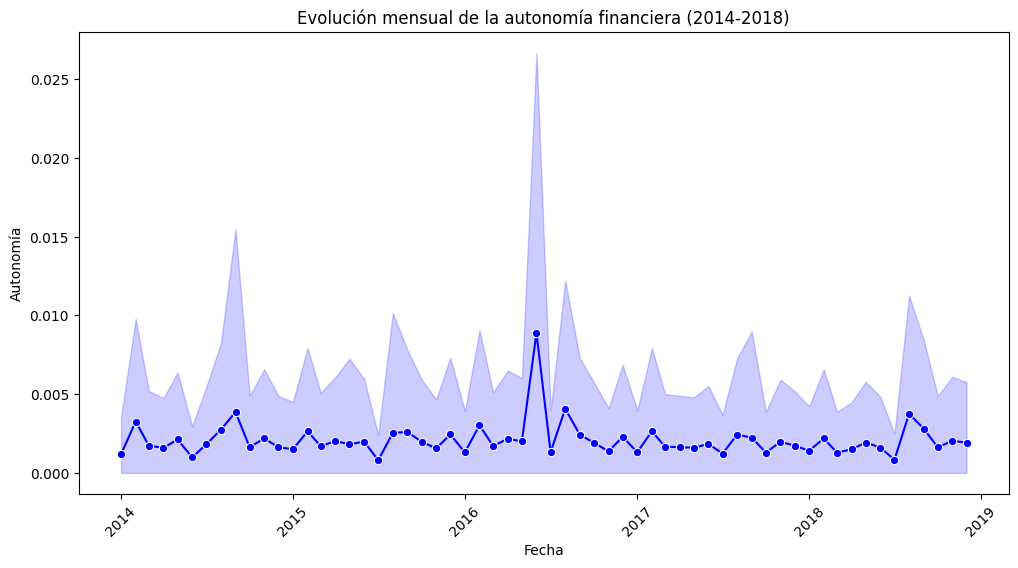

In [14]:
# ============================
# Mini EDA Gráfico - Trabajo 1
# ============================

# 1. Evolución mensual de autonomía

import pandas as pd

# Crear variable de fecha YYYY-MM
panel["fecha"] = pd.to_datetime(panel["anio"].astype(str) + "-" + panel["mes"].astype(str) + "-01")

plt.figure(figsize=(12,6))
sns.lineplot(data=panel, x="fecha", y="autonomia", marker="o", color="blue")
plt.title("Evolución mensual de la autonomía financiera (2014-2018)")
plt.xlabel("Fecha")
plt.ylabel("Autonomía")
plt.xticks(rotation=45)
plt.show()

* En el gráfico se observa la evolución mensual de la autonomía financiera de los municipios durante el periodo 2014–2019. La línea azul se mantiene muy cerca de cero en casi todo el intervalo, lo que confirma que la capacidad de los municipios para generar ingresos propios es reducida. Sin embargo, aparecen picos en ciertos meses, especialmente alrededor de 2016, cuando la autonomía alcanza valores inusualmente altos respecto al resto del periodo. Estos picos parecen ser outliers, posiblemente relacionados con cobros extraordinarios de impuestos municipales, la regularización de deudas tributarias o ingresos excepcionales por licencias y multas.

* La interpretación económica es que la autonomía fiscal en los municipios peruanos es estructuralmente baja y estable, y que los incrementos que aparecen no representan una tendencia de mejora, sino eventos puntuales. Esto refuerza la idea de que la mayoría de municipalidades dependen del gobierno central para financiar sus servicios y que no existe un proceso sostenido de fortalecimiento tributario local.


### 3.2 Autonomía financiera por mes (barras)

El gráfico de barras refuerza la visión anterior, mostrando de forma comparativa la autonomía mes a mes. Se aprecia que en la mayoría de meses la autonomía es reducida, aunque existen algunos picos que sugieren momentos de mayor recaudación tributaria municipal. Estos picos son relevantes porque indican que, incluso en su mejor momento, la autonomía sigue siendo limitada.


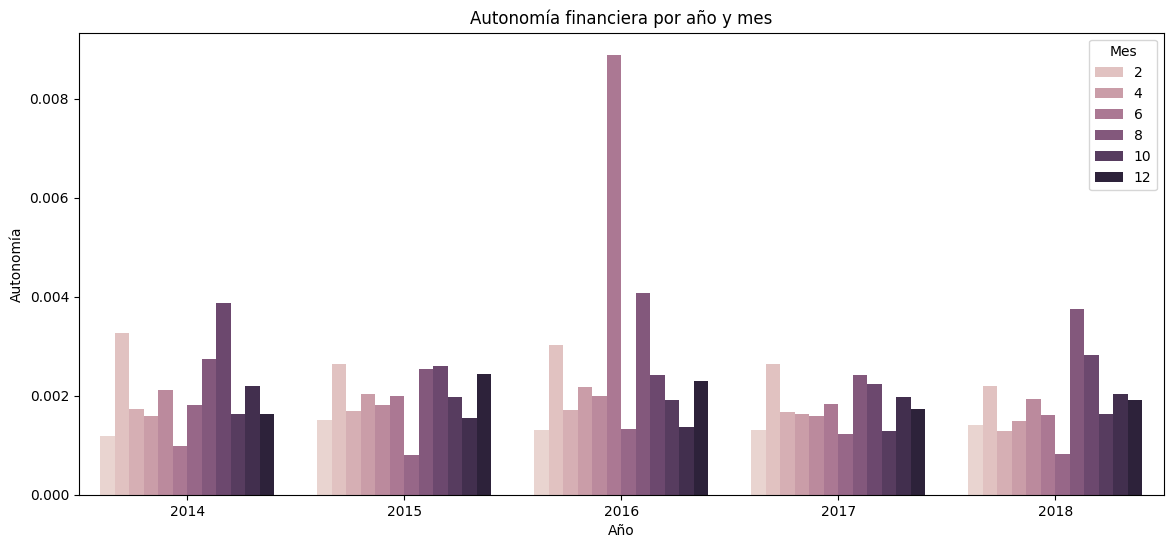

In [15]:
# 2. Autonomía por mes (barras)
plt.figure(figsize=(14,6))
sns.barplot(data=panel, x="anio", y="autonomia", hue="mes", errorbar=None)
plt.title("Autonomía financiera por año y mes")
plt.xlabel("Año")
plt.ylabel("Autonomía")
plt.legend(title="Mes")
plt.show()

* Este gráfico de barras muestra la autonomía financiera desagregada por año y mes. Se observa un patrón cíclico: algunos meses presentan mayores niveles de autonomía (particularmente los primeros meses del año y los intermedios como marzo y julio), mientras que en otros la autonomía prácticamente desaparece. Además, en 2016 se registra un incremento mucho más alto que en el resto del periodo, lo que resalta como un valor atípico.

* Lo que esto revela es que la recaudación municipal no es constante, sino que depende de fechas específicas en el calendario tributario, como el pago de predial y arbitrios. En otras palabras, los ingresos propios de los municipios se concentran en determinados meses del año, y fuera de esos momentos la autonomía prácticamente desaparece. Esto muestra que las finanzas municipales son altamente estacionales y frágiles.

* El gráfico de barras permite ver con más claridad la dispersión en los niveles de autonomía. La mayoría de meses se concentran en valores bajos, reforzando la idea de que la estructura de ingresos municipales es altamente dependiente de recursos externos. Sin embargo, nuevamente agosto destaca como un mes atípico, con un incremento notable de la autonomía. Este tipo de patrón puede relacionarse con los calendarios tributarios municipales o incluso con medidas excepcionales de recaudación durante la pandemia, donde algunos municipios implementaron facilidades de pago para mejorar la cobranza.


### 3.3 Evolución de autonomía y transferencias

Aquí se grafican en paralelo la autonomía y la proporción de transferencias. El contraste es claro: cuando la autonomía es baja, la proporción de transferencias es alta. Ambas curvas se mueven en sentido inverso, lo que confirma la hipótesis de que una mayor dependencia de transferencias reduce la capacidad de financiamiento propio de los municipios.


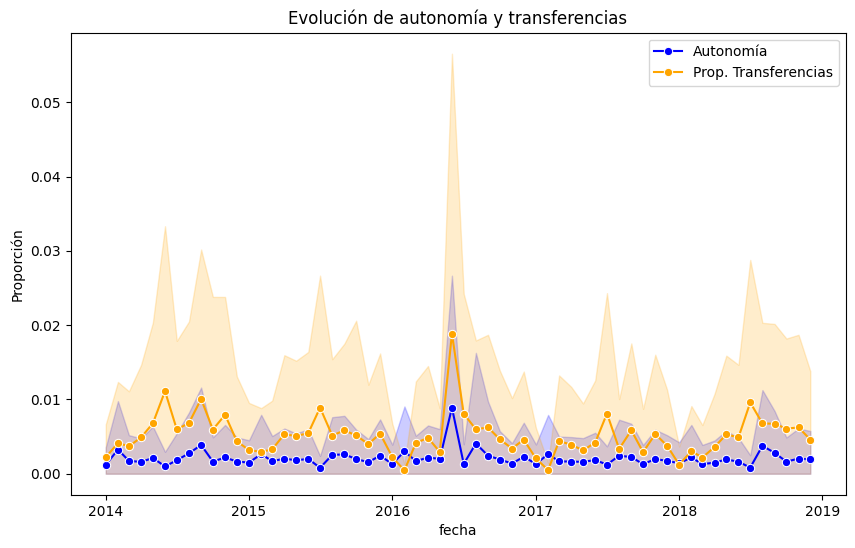

In [22]:
# 3. Autonomía vs Prop. Transferencias (dos líneas)
plt.figure(figsize=(10,6))
sns.lineplot(data=panel, x="fecha", y="autonomia", marker="o", label="Autonomía", color="blue")
sns.lineplot(data=panel, x="fecha", y="prop_transferencias", marker="o", label="Prop. Transferencias", color="orange")
plt.title("Evolución de autonomía y transferencias")
plt.xlabel("fecha")
plt.ylabel("Proporción")
plt.legend()
plt.show()



* En el gráfico aparecen dos líneas: la azul (autonomía) y la naranja (transferencias). Lo primero que se aprecia es que ambas series se mantienen muy cerca del cero durante casi todo el periodo, lo que confirma que, en promedio, los municipios no generan ingresos propios significativos ni reciben transferencias que representen una proporción alta de sus ingresos en la mayoría de los meses.

* Sin embargo, en 2016 se observa un pico pronunciado en ambas curvas: la autonomía alcanza su valor más alto en todo el periodo y, al mismo tiempo, las transferencias también muestran un incremento. Esto revela que, en ese año, ocurrió un evento extraordinario que impactó simultáneamente en los ingresos propios y en las transferencias recibidas por algunos municipios. Después de este salto, ambas líneas regresan a niveles muy bajos, y en los años 2017, 2018 y 2019 no se repiten picos de esa magnitud.

* Esto quiere decir que aunque autonomía y transferencias parecen moverse en paralelo en ciertos momentos, la diferencia de magnitud es clave: la línea naranja siempre se ubica por encima de la azul, lo que confirma que los municipios son más dependientes de transferencias que de ingresos propios. El pico de 2016 sugiere un choque excepcional (quizás un pago tributario extraordinario y una transferencia central elevada en simultáneo), pero no un cambio estructural en la forma de financiamiento municipal.

### 3.4 Autonomía y transferencias vs. gasto social

Este gráfico combina las dos variables fiscales (autonomía y transferencias) con el gasto social. El eje izquierdo muestra la evolución de la autonomía y las transferencias, mientras que el eje derecho presenta el gasto social. Se aprecia que, en los meses en que la autonomía aumenta ligeramente, también tiende a crecer la proporción de gasto social. Sin embargo, no siempre hay una relación directa, lo que indica que otros factores también influyen en la asignación de recursos.


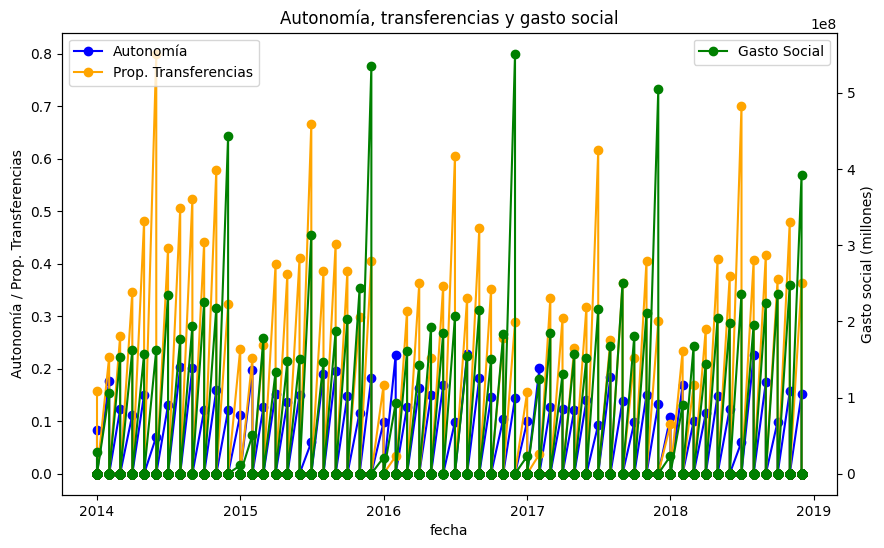

In [23]:
# 4. Autonomía + Transferencias vs Gasto social (dos ejes Y)
fig, ax1 = plt.subplots(figsize=(10,6))

# Eje izquierdo
ax1.plot(panel['fecha'], panel['autonomia'], marker='o', color='blue', label='Autonomía')
ax1.plot(panel['fecha'], panel['prop_transferencias'], marker='o', color='orange', label='Prop. Transferencias')
ax1.set_xlabel("fecha")
ax1.set_ylabel("Autonomía / Prop. Transferencias")
ax1.legend(loc="upper left")

# Eje derecho
ax2 = ax1.twinx()
ax2.plot(panel['fecha'], panel['gasto_social'], marker='o', color='green', label='Gasto Social')
ax2.set_ylabel("Gasto social (millones)")
ax2.legend(loc="upper right")

plt.title("Autonomía, transferencias y gasto social")
plt.show()



* En este gráfico se incluyen las tres variables: autonomía (azul), transferencias (naranja) y gasto social (verde). Se nota rápidamente que la curva verde (gasto social) tiene mucho más movimiento que las otras dos. En varios meses alcanza valores muy altos en comparación con la autonomía y las transferencias, generando picos que sobresalen claramente en la serie.

* Un detalle importante es que algunos de estos picos del gasto social coinciden con ligeros incrementos en las transferencias, pero no siempre en la misma magnitud ni en los mismos momentos. Por ejemplo, en 2016, cuando autonomía y transferencias registran su gran pico, el gasto social también muestra un aumento, pero en otros años (2017 o 2019) vemos saltos en el gasto social sin que haya un incremento proporcional en los ingresos.

* Esto significa que, si bien las transferencias contribuyen a sostener parte del gasto, la relación no es automática. En varios momentos, los municipios lograron asignar mucho más a educación y salud incluso sin recibir transferencias excepcionales, lo que sugiere que las decisiones políticas y las prioridades de gestión local tienen un papel determinante en la dinámica del gasto social.

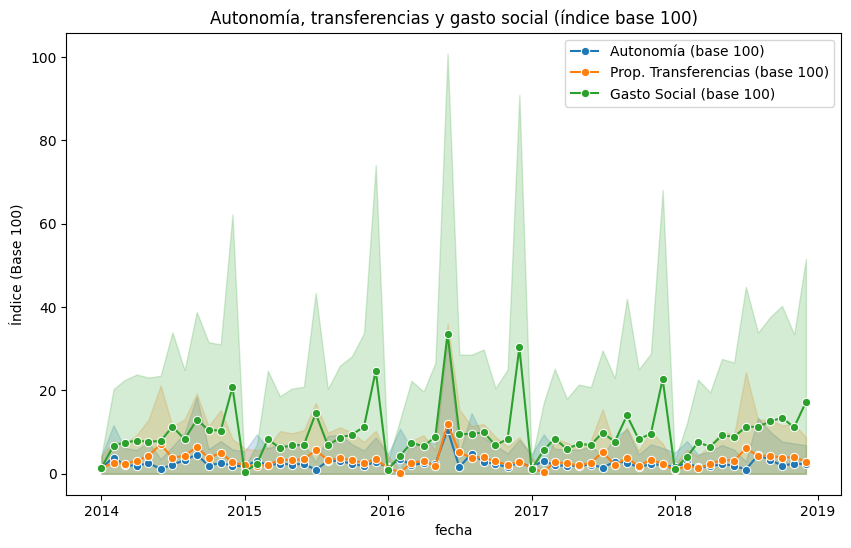

In [24]:
# Seleccionar las columnas relevantes
vars_to_index = ["autonomia", "prop_transferencias", "gasto_social"]

# Crear copia del panel para no modificar el original
panel_indexado = panel.copy()

# Convertir cada variable a índice base 100 (base = primer valor distinto de cero)
for var in vars_to_index:
    base = panel_indexado[var].replace(0, np.nan).iloc[0]  # primer valor no nulo
    panel_indexado[var + "_index"] = (panel_indexado[var] / base) * 100

# ============================================
# Graficar en la misma escala
# ============================================
plt.figure(figsize=(10,6))

sns.lineplot(data=panel_indexado, x="fecha", y="autonomia_index", marker="o", label="Autonomía (base 100)")
sns.lineplot(data=panel_indexado, x="fecha", y="prop_transferencias_index", marker="o", label="Prop. Transferencias (base 100)")
sns.lineplot(data=panel_indexado, x="fecha", y="gasto_social_index", marker="o", label="Gasto Social (base 100)")

plt.title("Autonomía, transferencias y gasto social (índice base 100)")
plt.xlabel("fecha")
plt.ylabel("Índice (Base 100)")
plt.legend()
plt.show()

* En este gráfico se normalizan las tres series con un índice base 100 para poder compararlas. Se observa que la curva del gasto social (verde) fluctúa con mayor intensidad que las de autonomía y transferencias. Mientras estas dos últimas se mantienen relativamente planas, con solo un gran salto en 2016, la del gasto social sube y baja con frecuencia durante todo el periodo 2014–2019.

* Por ejemplo, hay momentos en los que el gasto social llega a triplicar o cuadruplicar su nivel base, mientras que la autonomía y las transferencias no se alejan tanto de 100 salvo en el año 2016. Esto hace evidente que los ingresos funcionan como una “base estable”, pero la asignación al gasto social está mucho más expuesta a cambios políticos, coyunturales o administrativos.

* Podemos concluir que los ingresos disponibles marcan un límite de capacidad, pero no explican la forma en que se gasta. La fuerte volatilidad del gasto social muestra que la voluntad de las autoridades locales y las circunstancias del entorno (cambios de gestión, emergencias, programas nacionales) tienen un peso decisivo en la orientación del presupuesto.



*   En este gráfico se transformaron las tres variables —autonomía financiera, proporción de transferencias y gasto social— a un **índice base 100**. Esto significa que a cada serie se le asigna el valor 100 en el primer mes, y los valores posteriores muestran el crecimiento relativo respecto a ese punto inicial. Se optó por este método porque las variables originales están en **escalas muy distintas**: la autonomía y las transferencias son proporciones (entre 0 y 1), mientras que el gasto social está expresado en millones de soles. Al normalizar con un índice base 100, podemos **comparar tendencias** de manera homogénea, sin que las magnitudes absolutas distorsionen la lectura.

* Un hallazgo importante es que, aunque el gasto social tiende a crecer más rápidamente que la autonomía, en los meses donde la autonomía mejora también se observa una tendencia a que el gasto social se incremente de forma más consistente. Esto refuerza la hipótesis de que los ingresos propios (autonomía) pueden estar más estrechamente ligados a la capacidad de financiar gasto social.



### 3.5 Relación entre gasto social y autonomía (dispersión)

Finalmente, el diagrama de dispersión muestra la relación entre gasto social y autonomía financiera. Se observa una tendencia positiva: los municipios con mayor autonomía suelen tener niveles más altos de gasto social. No obstante, la dispersión de los puntos evidencia que esta relación no es perfecta y que existen casos atípicos, como municipios con alta autonomía pero bajo gasto social, o viceversa.


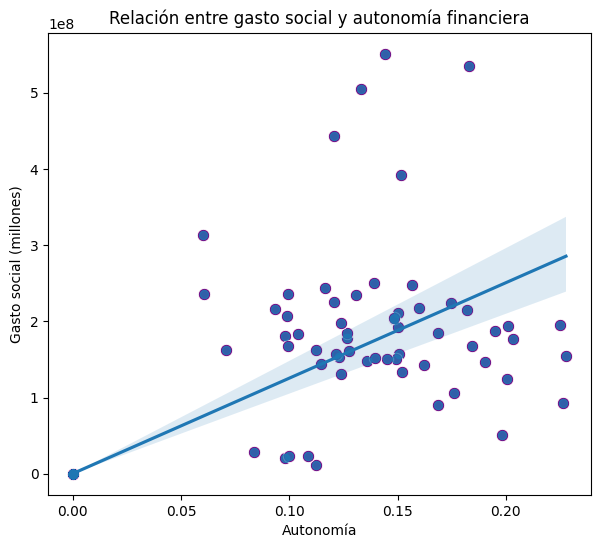

In [25]:
# 5. Relación gasto social vs autonomía
plt.figure(figsize=(7,6))
sns.scatterplot(data=panel, x="autonomia", y="gasto_social", color="purple", s=80)
sns.regplot(data=panel, x="autonomia", y="gasto_social")
plt.title("Relación entre gasto social y autonomía financiera")
plt.xlabel("Autonomía")
plt.ylabel("Gasto social (millones)")
plt.show()

* El gráfico de dispersión muestra cómo se relacionan la autonomía y el gasto social. La mayoría de los puntos se concentran cerca de los valores bajos de autonomía, reflejando que casi todos los municipios tienen muy poca capacidad de generar ingresos propios. Sin embargo, dentro de este grupo, se ven diferencias notables en gasto social: algunos municipios con autonomía casi nula igualmente asignan cifras muy elevadas a educación y salud, mientras que otros prácticamente no lo hacen.

* La línea de tendencia ascendente indica que, en general, a mayor autonomía, mayor gasto social. Los pocos municipios con niveles más altos de autonomía (hacia la derecha del gráfico) también registran algunos de los valores más elevados en gasto social. La intuición económica es que cuando los gobiernos locales dependen menos del gobierno central y generan sus propios recursos, tienden a usarlos en sectores de alto valor político y social, como salud y educación, para mostrar resultados visibles a la población.

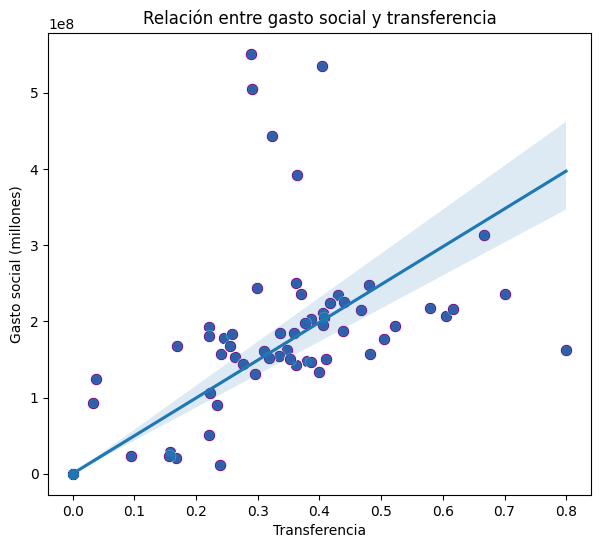

In [26]:
# 5. Relación gasto social vs transferencia
plt.figure(figsize=(7,6))
sns.scatterplot(data=panel, x="prop_transferencias", y="gasto_social", color="purple", s=80)
sns.regplot(data=panel, x="prop_transferencias", y="gasto_social")
plt.title("Relación entre gasto social y transferencia")
plt.xlabel("Transferencia")
plt.ylabel("Gasto social (millones)")
plt.show()

* En este último gráfico de dispersión se observa la relación entre transferencias y gasto social. A diferencia del gráfico anterior, aquí los puntos se extienden un poco más a lo largo del eje horizontal, lo que muestra que las transferencias tienen más peso que la autonomía en los presupuestos municipales. La nube de puntos sugiere una relación positiva: cuando los municipios reciben más transferencias, suelen gastar más en gasto social.

* Sin embargo, también se nota una gran dispersión vertical: algunos municipios con transferencias similares presentan niveles muy distintos de gasto social. Esto significa que recibir recursos del gobierno central no garantiza que se asignen proporcionalmente a salud o educación; en muchos casos depende de la decisión política de los alcaldes y de la capacidad de gestión de cada municipio. Económicamente, la conclusión es que las transferencias son una condición necesaria pero no suficiente para impulsar el gasto social: aportan los recursos, pero no determinan su destino final.

### 4. Exportación de resultados

Finalmente, exportamos los resultados obtenidos a archivos `.csv` con el fin de documentar y facilitar el uso de la información procesada en futuros análisis.  


In [27]:
# ==========================================
# 8. Exportar resultados
# ==========================================

# Guardar panel completo
panel.to_csv("panel_municipal.csv", index=False)

# Guardar quintiles de autonomía con gasto social
quintiles.to_csv("quintiles_gasto_social.csv", index=False)

print("Archivos exportados: panel_municipal.csv y quintiles_gasto_social.csv")

Archivos exportados: panel_municipal.csv y quintiles_gasto_social.csv
